# Warp factory for Python

This code represents the outcome of an exploration I conducted on how to compute the stress-energy tensor for a given spacetime metric. My goal is to replicate the functionality of the "Warp Factory" code described in the paper arXiv:2404.03095.

In contrast to the approach in that study, I aim to leverage the full capabilities of SymPy and EinsteinPy to derive analytical expressions for various quantities of interest, avoiding reliance on numerical approximations whenever possible. This symbolic approach allows for greater flexibility and precision in theoretical investigations.

I may introduce additional constraints on the physicality of the energy-momentum tensor, particularly when negative energy arises, as discussed in arXiv
/9702026.

At this stage, the code is more of a collection of potential applications without a clear overarching theme or direction.

### import relevant library

In [1]:
import sympy as sp
from einsteinpy.symbolic import MetricTensor, ChristoffelSymbols, RiemannCurvatureTensor, RicciTensor, RicciScalar, EinsteinTensor
from sympy import init_printing

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt


## Numerical evaluation from sympy

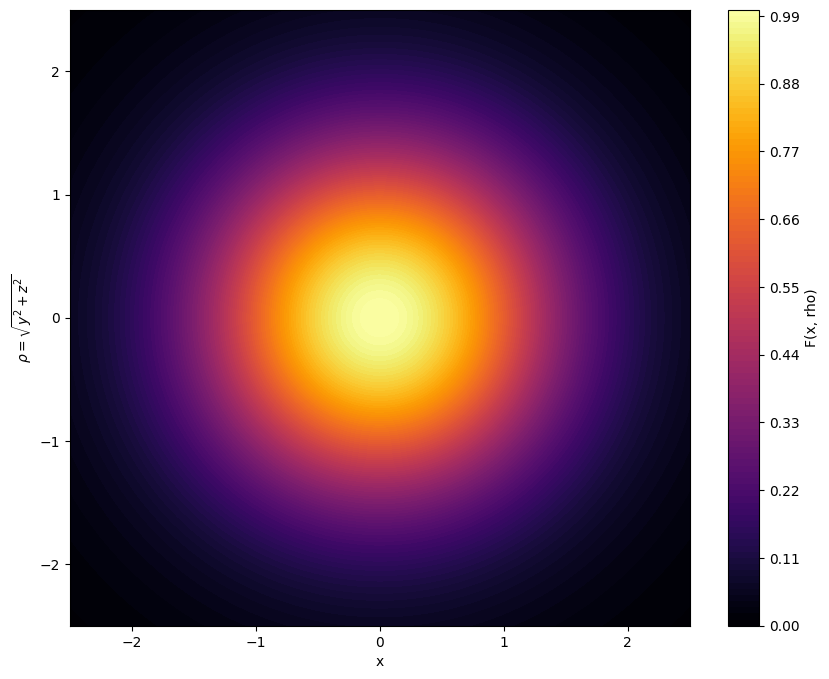

In [2]:
# Define the symbols
x, y, z, t, sigma, v, R = sp.symbols('x y z t sigma v R')

# Define rho and R
rho = sp.sqrt(y**2 + z**2)
r_s = sp.sqrt((x - v * t)**2 + rho**2)

# Define the function f
f = (sp.tanh(sigma * (r_s+R)) - sp.tanh(sigma * (r_s-R))) / (2*sp.tanh(sigma * R))


# Convert the SymPy expression to a numerical function
f_numeric = sp.lambdify((x, y, z, t, sigma, v, R), f, 'numpy')

# Define the grid
a=2.5
x_values = np.linspace(-a, a, 1000)
y_values = np.linspace(-a, a, 1000)
z_value = 0
sigma_value = 1  # Example value for sigma
v_value = 1      # Example value for v
t_value=0
R_value=1

# Create a meshgrid for x and rho (since rho = sqrt(y^2 + z^2), we can use y and z directly)
X, Y = np.meshgrid(x_values, y_values)

# Evaluate the function over the grid
F = f_numeric(X, Y, z_value ,t_value, sigma_value, v_value, R_value)




# Assuming X, Y, and F are already defined arrays

plt.figure(figsize=(10, 8))

# Create the heatmap with more levels
levels = 100  # Increase this value for smoother gradients
plt.contourf(X, Y, F, levels=levels, cmap='inferno')

# Add labels and a colorbar
plt.colorbar(label='F(x, rho)')
plt.xlabel('x')
plt.ylabel(r'$\rho = \sqrt{y^2 + z^2}$')

# Show the plot
plt.show()

## Tetrahed computation

In [3]:
# Create symbols g0 to g10
g = sp.symbols('g1:11')
e_ = sp.symbols('e1:11')
# Create a 4x4 symbolic matrix (filling from g0 to g10)
G = sp.Matrix([
    [g[0], g[1], g[2], g[3]],
    [g[1], g[4], g[5], g[6]],
    [g[2], g[5], g[7], g[8]],
    [g[3], g[6], g[8], g[9]]
])

E = sp.Matrix([
    [e_[0],  0   ,  0   ,  0   ],
    [e_[1], e_[4],  0   ,  0   ],
    [e_[2], e_[5], e_[7],  0   ],
    [e_[3], e_[6], e_[8], e_[9]]
])

In [4]:
E

Matrix([
[e1,  0,  0,   0],
[e2, e5,  0,   0],
[e3, e6, e8,   0],
[e4, e7, e9, e10]])

In [5]:
G

Matrix([
[g1, g2, g3,  g4],
[g2, g5, g6,  g7],
[g3, g6, g8,  g9],
[g4, g7, g9, g10]])

In [6]:
# Define the scalars A, B, C, and D
# Define the scalars with adjusted indices
A = g[9]

B = -g[8]**2 + g[7] * g[9]

C = (-g[4] * g[8]**2 - g[7] * g[6]**2 - g[9] * g[5]**2
     + 2 * g[5] * g[6] * g[8] + g[4] * g[7] * g[9])


D = (g[1]**2 * g[8]**2 + g[2]**2 * g[6]**2 + g[3]**2 * g[5]**2
     - g[7] * g[9] * g[1]**2 - g[4] * g[9] * g[2]**2 - g[4] * g[7] * g[3]**2
     - g[0] * g[9] * g[5]**2 - g[0] * g[7] * g[6]**2 - g[0] * g[4] * g[8]**2
     + 2 * g[9] * g[1] * g[2] * g[5] + 2 * g[7] * g[1] * g[3] * g[6]
     + 2 * g[4] * g[2] * g[3] * g[8] + 2 * g[0] * g[5] * g[6] * g[8] 
     - 2 * g[1] * g[2] * g[6] * g[8] - 2 * g[1] * g[3] * g[5] * g[8]
     - 2 * g[2] * g[3] * g[5] * g[6] + g[0] * g[4] * g[7] * g[9])


#note : (A,B,C,D) = (-,+,+,+)

In [7]:
display(A)
display(B)
display(C)
display(D)

g10

g10*g8 - g9**2

g10*g5*g8 - g10*g6**2 - g5*g9**2 + 2*g6*g7*g9 - g7**2*g8

g1*g10*g5*g8 - g1*g10*g6**2 - g1*g5*g9**2 + 2*g1*g6*g7*g9 - g1*g7**2*g8 - g10*g2**2*g8 + 2*g10*g2*g3*g6 - g10*g3**2*g5 + g2**2*g9**2 - 2*g2*g3*g7*g9 - 2*g2*g4*g6*g9 + 2*g2*g4*g7*g8 + g3**2*g7**2 + 2*g3*g4*g5*g9 - 2*g3*g4*g6*g7 - g4**2*g5*g8 + g4**2*g6**2

In [8]:
E_0 =(1 / sp.sqrt(-C * D)) * sp.Matrix([
    C,                
     
     g[1] * g[8]**2 + g[2] * g[5] * g[9] + g[3] * g[6] * g[7] - g[1] * g[7] * g[9] - g[2] * g[6] * g[8] - g[3] * g[5] * g[8],

    g[2] * g[6]**2 + g[1] * g[5] * g[9] + g[3] * g[4] * g[8] - g[1] * g[6] * g[8] - g[2] * g[4] * g[9] - g[3] * g[5] * g[6],

    g[3] * g[5]**2 + g[1] * g[6] * g[7] + g[2] * g[4] * g[8] - g[1] * g[5] * g[8] - g[2] * g[5] * g[6] - g[3] * g[4] * g[7]

])



E_1=(1 / sp.sqrt(B*C)) * sp.Matrix([
    0,                
     
    B,

    #g[5] * g[9] - g[6] * g[8],
    -g[5] * g[9] + g[6] * g[8],

    g[5] * g[8] - g[6] * g[7]

])

E_2=(1 / sp.sqrt(A*B)) * sp.Matrix([
    0,                
     
    0,

    A,

    -g[8] 

])

E_3=(1 / sp.sqrt(A)) * sp.Matrix([
    0,                
     
    0,

    0,

    1

])

E_solution=matrix = sp.Matrix.hstack(E_0, E_1, E_2, E_3)

In [9]:
E_solution.T

Matrix([
[(g10*g5*g8 - g10*g6**2 - g5*g9**2 + 2*g6*g7*g9 - g7**2*g8)/sqrt((-g10*g5*g8 + g10*g6**2 + g5*g9**2 - 2*g6*g7*g9 + g7**2*g8)*(g1*g10*g5*g8 - g1*g10*g6**2 - g1*g5*g9**2 + 2*g1*g6*g7*g9 - g1*g7**2*g8 - g10*g2**2*g8 + 2*g10*g2*g3*g6 - g10*g3**2*g5 + g2**2*g9**2 - 2*g2*g3*g7*g9 - 2*g2*g4*g6*g9 + 2*g2*g4*g7*g8 + g3**2*g7**2 + 2*g3*g4*g5*g9 - 2*g3*g4*g6*g7 - g4**2*g5*g8 + g4**2*g6**2)), (-g10*g2*g8 + g10*g3*g6 + g2*g9**2 - g3*g7*g9 - g4*g6*g9 + g4*g7*g8)/sqrt((-g10*g5*g8 + g10*g6**2 + g5*g9**2 - 2*g6*g7*g9 + g7**2*g8)*(g1*g10*g5*g8 - g1*g10*g6**2 - g1*g5*g9**2 + 2*g1*g6*g7*g9 - g1*g7**2*g8 - g10*g2**2*g8 + 2*g10*g2*g3*g6 - g10*g3**2*g5 + g2**2*g9**2 - 2*g2*g3*g7*g9 - 2*g2*g4*g6*g9 + 2*g2*g4*g7*g8 + g3**2*g7**2 + 2*g3*g4*g5*g9 - 2*g3*g4*g6*g7 - g4**2*g5*g8 + g4**2*g6**2)), (g10*g2*g6 - g10*g3*g5 - g2*g7*g9 + g3*g7**2 + g4*g5*g9 - g4*g6*g7)/sqrt((-g10*g5*g8 + g10*g6**2 + g5*g9**2 - 2*g6*g7*g9 + g7**2*g8)*(g1*g10*g5*g8 - g1*g10*g6**2 - g1*g5*g9**2 + 2*g1*g6*g7*g9 - g1*g7**2*g8 - g10*g2

In [10]:
N=E_solution.T*G*E_solution
display(sp.simplify(N))

Matrix([
[-1, 0, 0, 0],
[ 0, 1, 0, 0],
[ 0, 0, 1, 0],
[ 0, 0, 0, 1]])

### Check the time hypersurface orthogonality

In [11]:
# Define the new variables
alpha, beta1, beta2, beta3 = sp.symbols('alpha beta1 beta2 beta3')
gamma11, gamma12, gamma13 = sp.symbols('gamma11 gamma12 gamma13')
gamma22, gamma23 = sp.symbols('gamma22 gamma23')
gamma33 = sp.symbols('gamma33')

Gamma=sp.Matrix([
    [gamma11, gamma12, gamma13],
    [gamma12, gamma22, gamma23],
    [gamma13, gamma23, gamma33]
])

beta_vector = sp.Matrix([beta1, beta2, beta3])


# Compute the covariant components beta_i
beta_covariant = Gamma * beta_vector

# Compute beta^i * beta_i
beta_dot_beta = beta_vector.dot(beta_covariant)

In [12]:
# Define substitutions for the new variables
substitutions = {
    g[0]: -alpha**2 + beta_dot_beta,
    g[1]: beta1,
    g[2]: beta2,
    g[3]: beta3,
    g[4]: gamma11,
    g[5]: gamma12,
    g[6]: gamma13,
    g[7]: gamma22,
    g[8]: gamma23,
    g[9]: gamma33   
}

# Update the original matrix G
G_new = G.subs(substitutions)

# Display the updated matrix
display(G_new)

Matrix([
[-alpha**2 + beta1*(beta1*gamma11 + beta2*gamma12 + beta3*gamma13) + beta2*(beta1*gamma12 + beta2*gamma22 + beta3*gamma23) + beta3*(beta1*gamma13 + beta2*gamma23 + beta3*gamma33),   beta1,   beta2,   beta3],
[                                                                                                                                                                            beta1, gamma11, gamma12, gamma13],
[                                                                                                                                                                            beta2, gamma12, gamma22, gamma23],
[                                                                                                                                                                            beta3, gamma13, gamma23, gamma33]])

In [13]:
substitutions2 = {
    g[0]: -alpha**2 + beta1**2+beta2**2+beta3**2,
    g[1]: beta1,
    g[2]: beta2,
    g[3]: beta3,
    g[4]: 1,
    g[5]: 0,
    g[6]: 0,
    g[7]: 1,
    g[8]: 0,
    g[9]: 1   
}

In [14]:
E_0_ortho=E_0.subs(substitutions2)

display(sp.simplify(E_0_ortho))

Matrix([
[     1/sqrt(alpha**2)],
[-beta1/sqrt(alpha**2)],
[-beta2/sqrt(alpha**2)],
[-beta3/sqrt(alpha**2)]])

## Auto compute of curvature tensors

### Sphere case 2D manifolds

In [15]:
# Define the coordinates for 3D spherical coordinates (r, theta, phi)
theta, phi = sp.symbols('theta phi')

# Define the metric tensor for 3D spherical coordinates
metric = [[0 for i in range(2)] for i in range(2)]
metric[0][0] = 1
metric[1][1] = sp.sin(theta)**2

# Define the symbols array
symbols = [theta, phi]

# Create a MetricTensor object
m_obj = MetricTensor(metric, symbols)

# Compute Christoffel symbols
ch = ChristoffelSymbols.from_metric(m_obj)

# Compute Riemann Curvature Tensor
riemann = RiemannCurvatureTensor.from_christoffels(ch)

# Compute Ricci Tensor
ricci = RicciTensor.from_riemann(riemann)

# Compute Ricci Scalar
ricci_scalar = RicciScalar.from_riccitensor(ricci)

# Display the results
print("Metric Tensor:")
sp.pretty_print(m_obj.tensor())

print("\nChristoffel Symbols:")
sp.pretty_print(ch.tensor())

print("\nRiemann Curvature Tensor:")
sp.pretty_print(riemann.tensor())

print("\nRicci Tensor:")
sp.pretty_print(ricci.tensor())

print("\nRicci Scalar:")
sp.pretty_print(ricci_scalar.simplify())

Metric Tensor:
⎡1     0   ⎤
⎢          ⎥
⎢      2   ⎥
⎣0  sin (θ)⎦

Christoffel Symbols:
⎡                     ⎡        cos(θ)⎤⎤
⎢                     ⎢  0     ──────⎥⎥
⎢⎡0        0       ⎤  ⎢        sin(θ)⎥⎥
⎢⎢                 ⎥  ⎢              ⎥⎥
⎢⎣0  -sin(θ)⋅cos(θ)⎦  ⎢cos(θ)        ⎥⎥
⎢                     ⎢──────    0   ⎥⎥
⎣                     ⎣sin(θ)        ⎦⎦

Riemann Curvature Tensor:
⎡         ⎡             2   ⎤⎤
⎢⎡0  0⎤   ⎢   0      sin (θ)⎥⎥
⎢⎢    ⎥   ⎢                 ⎥⎥
⎢⎣0  0⎦   ⎢    2            ⎥⎥
⎢         ⎣-sin (θ)     0   ⎦⎥
⎢                            ⎥
⎢⎡0  -1⎤        ⎡0  0⎤       ⎥
⎢⎢     ⎥        ⎢    ⎥       ⎥
⎣⎣1  0 ⎦        ⎣0  0⎦       ⎦

Ricci Tensor:
⎡1     0   ⎤
⎢          ⎥
⎢      2   ⎥
⎣0  sin (θ)⎦

Ricci Scalar:
2


### Alcubierre Warp drive

In [16]:
t,x,y,z = sp.symbols('t x y z')


# Define the functions v(t) and f(x, y, z)
v = sp.Function('v')(t)
f = sp.Function('f')(t, x, y, z)




metric = [[0 for i in range(4)] for i in range(4)]
metric[0][0] = -1 + v**2*f**2
metric[1][1] = 1
metric[0][1] = -v*f
metric[1][0] = -v*f
metric[2][2] = 1
metric[3][3] = 1

# Define the symbols array
symbols = [t,x,y,z]

# Create a MetricTensor object
m_obj = MetricTensor(metric, symbols)

# Compute Christoffel symbols
ch = ChristoffelSymbols.from_metric(m_obj)

# Compute Riemann Curvature Tensor
riemann = RiemannCurvatureTensor.from_christoffels(ch)

# Compute Ricci Tensor
ricci = RicciTensor.from_riemann(riemann)

# Compute Ricci Scalar
ricci_scalar = RicciScalar.from_riccitensor(ricci)

# Display the results
print("Metric Tensor:")
sp.pretty_print(m_obj.tensor())

show_intermediate=False
if show_intermediate:
    print("\nChristoffel Symbols:")
    sp.pretty_print(ch.tensor())
    
    print("\nRiemann Curvature Tensor:")
    sp.pretty_print(riemann.tensor())
    
    print("\nRicci Tensor:")
    sp.pretty_print(ricci.tensor())
    
    print("\nRicci Scalar:")
    sp.pretty_print(ricci_scalar.simplify())





Metric Tensor:
⎡ 2              2                                  ⎤
⎢f (t, x, y, z)⋅v (t) - 1  -f(t, x, y, z)⋅v(t)  0  0⎥
⎢                                                   ⎥
⎢  -f(t, x, y, z)⋅v(t)              1           0  0⎥
⎢                                                   ⎥
⎢           0                       0           1  0⎥
⎢                                                   ⎥
⎣           0                       0           0  1⎦


In [17]:
einst = EinsteinTensor.from_metric(m_obj)

In [18]:
sp.latex(einst.tensor()[0][0].simplify())

'\\left(- 0.75 f^{2}{\\left(t,x,y,z \\right)} v^{2}{\\left(t \\right)} \\left(\\frac{\\partial}{\\partial y} f{\\left(t,x,y,z \\right)}\\right)^{2} - 0.75 f^{2}{\\left(t,x,y,z \\right)} v^{2}{\\left(t \\right)} \\left(\\frac{\\partial}{\\partial z} f{\\left(t,x,y,z \\right)}\\right)^{2} - 1.0 f{\\left(t,x,y,z \\right)} \\frac{\\partial^{2}}{\\partial y^{2}} f{\\left(t,x,y,z \\right)} - 1.0 f{\\left(t,x,y,z \\right)} \\frac{\\partial^{2}}{\\partial z^{2}} f{\\left(t,x,y,z \\right)} - 0.25 \\left(\\frac{\\partial}{\\partial y} f{\\left(t,x,y,z \\right)}\\right)^{2} - 0.25 \\left(\\frac{\\partial}{\\partial z} f{\\left(t,x,y,z \\right)}\\right)^{2}\\right) v^{2}{\\left(t \\right)}'

In [19]:
einst.tensor()[0][0].simplify()    #EinsteinTensor give the G_{uv}

(-0.75*f(t, x, y, z)**2*v(t)**2*Derivative(f(t, x, y, z), y)**2 - 0.75*f(t, x, y, z)**2*v(t)**2*Derivative(f(t, x, y, z), z)**2 - 1.0*f(t, x, y, z)*Derivative(f(t, x, y, z), (y, 2)) - 1.0*f(t, x, y, z)*Derivative(f(t, x, y, z), (z, 2)) - 0.25*Derivative(f(t, x, y, z), y)**2 - 0.25*Derivative(f(t, x, y, z), z)**2)*v(t)**2

In [20]:
U= sp.Matrix([1, v * f,0 ,0 ]) #it's U^u, U_u is given by (1,0,0,0)

In [21]:
result = 0
for u in range(4):
    for v in range(4):
        result += U[u] * U[v] * einst[u, v]

In [22]:
#sp.latex(result.simplify())

In [23]:
result.simplify() 

0.25*(-Derivative(f(t, x, y, z), y)**2 - Derivative(f(t, x, y, z), z)**2)*v(t)**2